<a href="https://colab.research.google.com/github/Asiya-Arif/Job-Market-Analysis/blob/main/Job_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load & Explore Data

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.subplots import make_subplots
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('ai_job_dataset1.csv')

In [6]:
df.head()

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


In [7]:
df.tail()

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
14995,AI14996,AI Product Manager,39171,USD,39171,MI,CT,China,M,China,50,"Azure, R, NLP, Docker, Computer Vision",PhD,4,Consulting,2025-01-07,2025-02-07,1107,5.2,Smart Analytics
14996,AI14997,AI Product Manager,77555,EUR,65922,EN,CT,Netherlands,M,Netherlands,50,"Python, TensorFlow, Mathematics, AWS, Computer...",PhD,0,Energy,2024-12-22,2025-02-12,1870,9.7,Autonomous Tech
14997,AI14998,Data Engineer,28380,USD,28380,EN,FL,India,M,India,50,"Azure, Kubernetes, Spark, Statistics, MLOps",Associate,1,Government,2024-05-04,2024-05-21,1558,9.0,Digital Transformation LLC
14998,AI14999,AI Specialist,58764,EUR,49949,EN,PT,France,M,France,100,"MLOps, Statistics, Data Visualization, R, Python",Master,0,Real Estate,2024-05-08,2024-06-22,546,8.4,Machine Intelligence Group
14999,AI15000,Principal Data Scientist,58623,USD,58623,SE,FT,China,M,China,0,"AWS, Spark, Computer Vision, Data Visualizatio...",PhD,6,Transportation,2024-11-23,2024-12-15,1034,9.7,Quantum Computing Inc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   salary_local            15000 non-null  int64  
 5   experience_level        15000 non-null  object 
 6   employment_type         15000 non-null  object 
 7   company_location        15000 non-null  object 
 8   company_size            15000 non-null  object 
 9   employee_residence      15000 non-null  object 
 10  remote_ratio            15000 non-null  int64  
 11  required_skills         15000 non-null  object 
 12  education_required      15000 non-null  object 
 13  years_experience        15000 non-null  int64  
 14  industry                15000 non-null

In [9]:
df.describe()

,salary_usd,salary_local,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,121991.938267,8.292366e+05,50.196667,6.365667,1500.852600,7.499540
std,63968.361846,3.425325e+06,40.844084,5.598551,574.724647,1.444202
min,16621.000000,1.662100e+04,0.000000,0.000000,500.000000,5.000000
25%,74978.500000,7.383075e+04,0.000000,2.000000,998.750000,6.300000
50%,107261.500000,1.090355e+05,50.000000,5.000000,1512.000000,7.500000
75%,155752.250000,1.673278e+05,100.000000,10.000000,1994.000000,8.800000
max,410273.000000,3.368541e+07,100.000000,19.000000,2499.000000,10.000000


In [10]:
df.shape

(15000, 20)

In [11]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency', 'salary_local',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [12]:
df.dtypes

,0
job_id,object
job_title,object
salary_usd,int64
salary_currency,object
salary_local,int64
experience_level,object
employment_type,object
company_location,object
company_size,object
employee_residence,object


In [14]:
df = df.drop(['job_description_length'],axis=1)

In [15]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,False


In [16]:
df.loc[df.duplicated()]

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,benefits_score,company_name


Salary Distribution

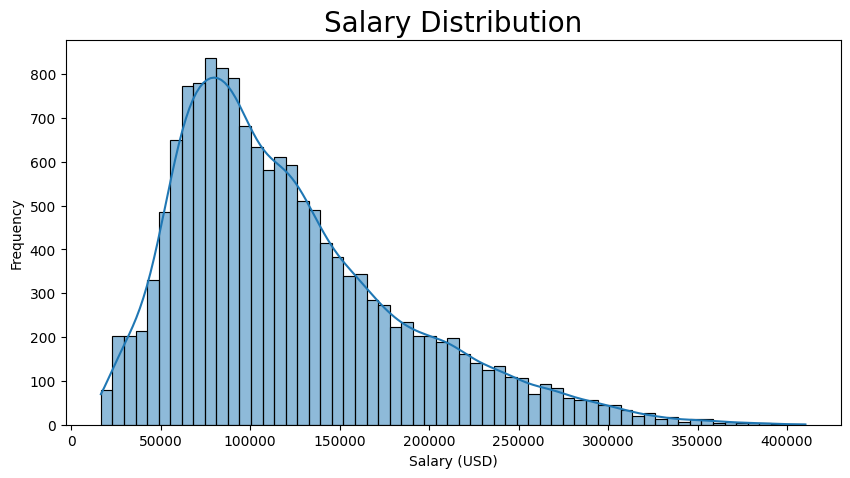

In [17]:
plt.figure(figsize=(10,5))
plt.title('Salary Distribution',fontsize=20)
sns.histplot(df.salary_usd,kde=True)
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

Highest paying jobs

In [18]:
def categories_desc_order(df,categories,values):
  cat_mean= df.groupby(categories)[values].mean()
  cat_desc = cat_mean.sort_values(ascending=False)
  return cat_desc.index

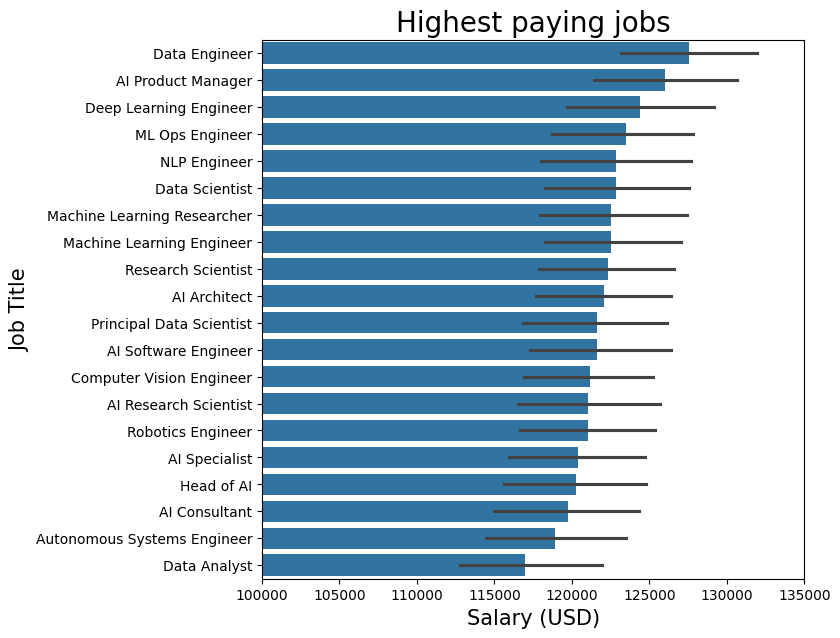

In [19]:
order = categories_desc_order(df,'job_title','salary_usd')
plt.figure(figsize=(7,7))
plt.axis([100000,135000,'Data Engineer','AI Product Manager'])
plt.title('Highest paying jobs',fontsize='20')
sns.barplot(x=df.salary_usd,y=df.job_title,order=order)
plt.xlabel('Salary (USD)', fontsize='15')
plt.ylabel('Job Title', fontsize= '15')
plt.show()

Highest paying companies

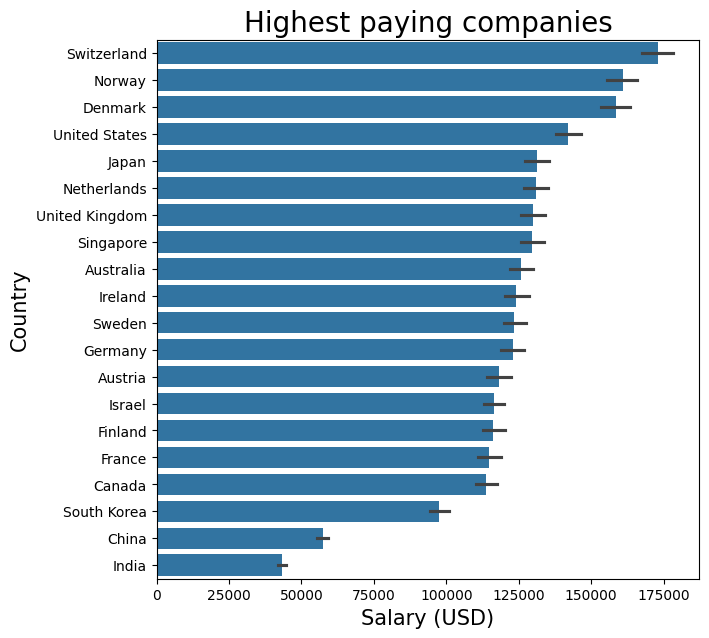

In [20]:
order = categories_desc_order(df,'company_location','salary_usd')
plt.figure(figsize=(7,7))
plt.title('Highest paying companies',fontsize='20')
sns.barplot(x=df.salary_usd,y=df.company_location,order=order)
plt.xlabel('Salary (USD)', fontsize='15')
plt.ylabel('Country', fontsize= '15')
plt.show()

Highest paying industries

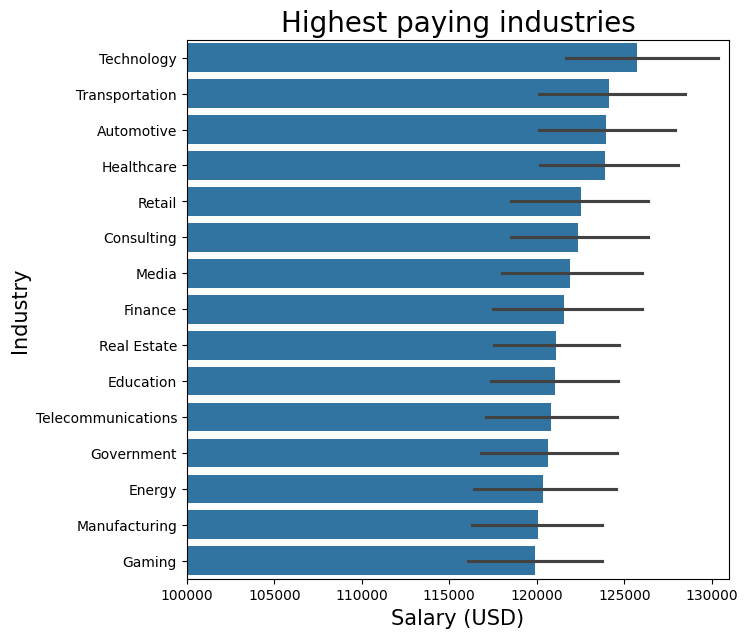

In [21]:
order = categories_desc_order(df,'industry','salary_usd')
plt.figure(figsize=(7,7))
plt.axis([100000,131000,'Technology','Transportation'])
plt.title('Highest paying industries',fontsize='20')
sns.barplot(x=df.salary_usd,y=df.industry,order=order)
plt.xlabel('Salary (USD)', fontsize='15')
plt.ylabel('Industry', fontsize= '15')
plt.show()

Most Required Skills

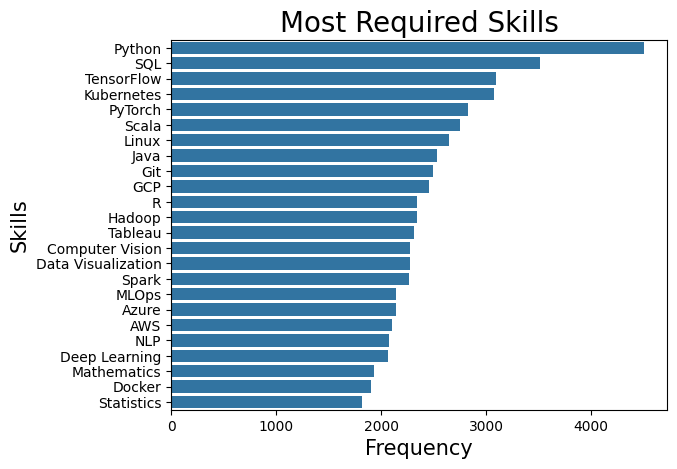

In [22]:
separated_list = df['required_skills'].dropna().str.split(',')
flat_values = [val.strip() for sublist in separated_list for val in sublist]
df_skills = pd.DataFrame(flat_values, columns=['required_skills'])
sns.barplot(x=df_skills['required_skills'].value_counts(), y=df_skills['required_skills'].value_counts().index)
plt.title('Most Required Skills', fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Skills', fontsize=15)
plt.show()

Highest Paying Countries

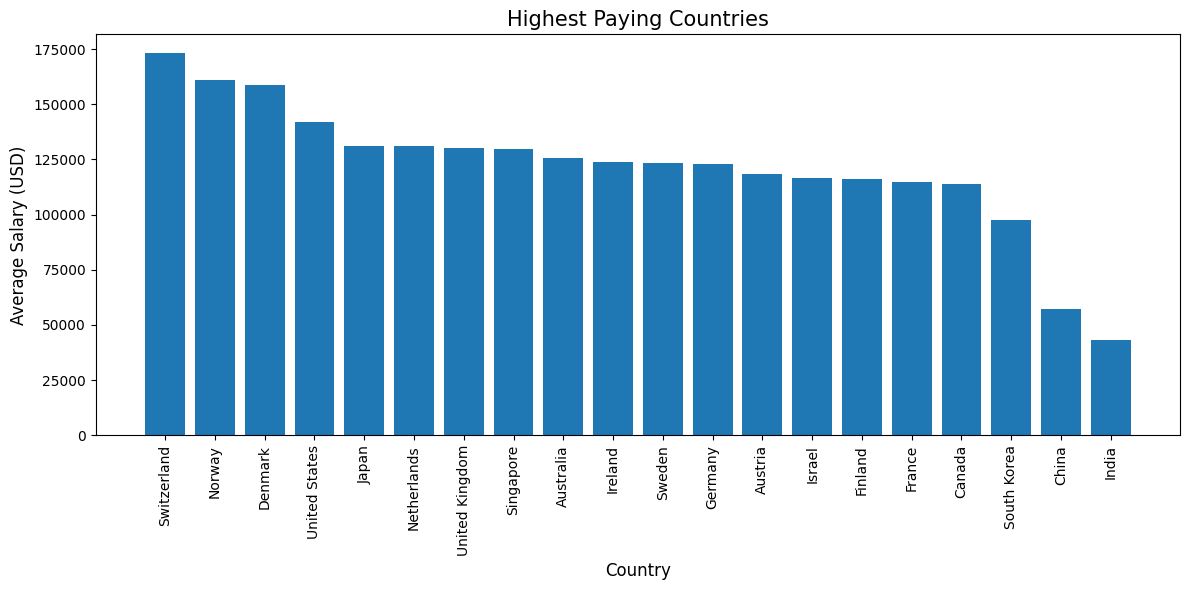

In [36]:
Highest_paying_countries = df.groupby('company_location')['salary_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(Highest_paying_countries.index, Highest_paying_countries.values, width=0.8)

plt.title("Highest Paying Countries", fontsize=15)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Experience vs Salary

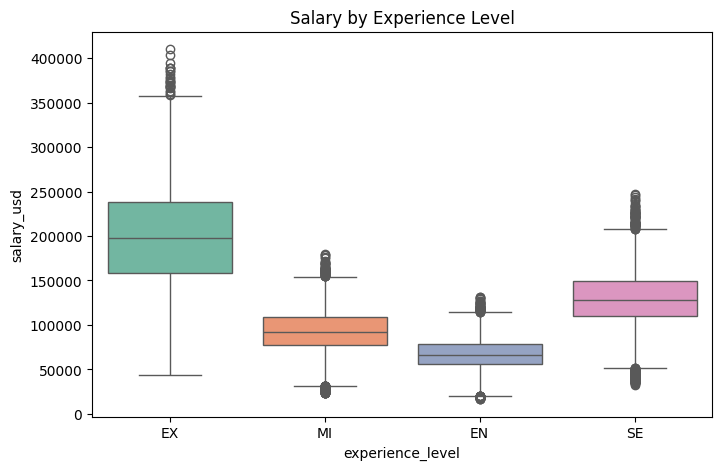

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x="experience_level", y="salary_usd", data=df, palette="Set2")
plt.title("Salary by Experience Level")
plt.show()

Remote Work Trends

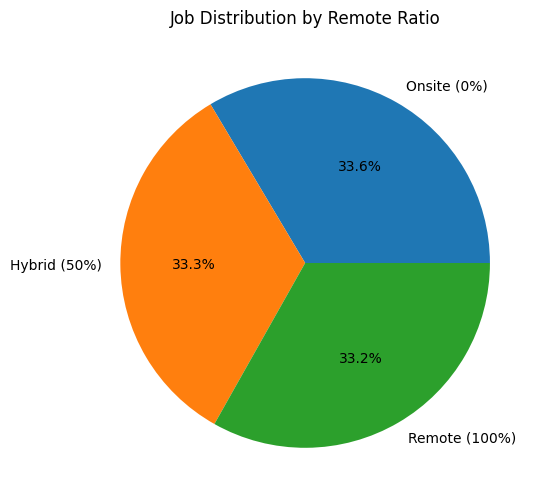

In [53]:
plt.figure(figsize=(6,6))
remote_counts = df["remote_ratio"].value_counts()

remote_counts.plot(kind="pie", autopct="%1.1f%%", labels=["Onsite (0%)", "Hybrid (50%)", "Remote (100%)"])
plt.title("Job Distribution by Remote Ratio")
plt.ylabel("")
plt.show()

Remote vs Onsite Salary by Country (Top 10)

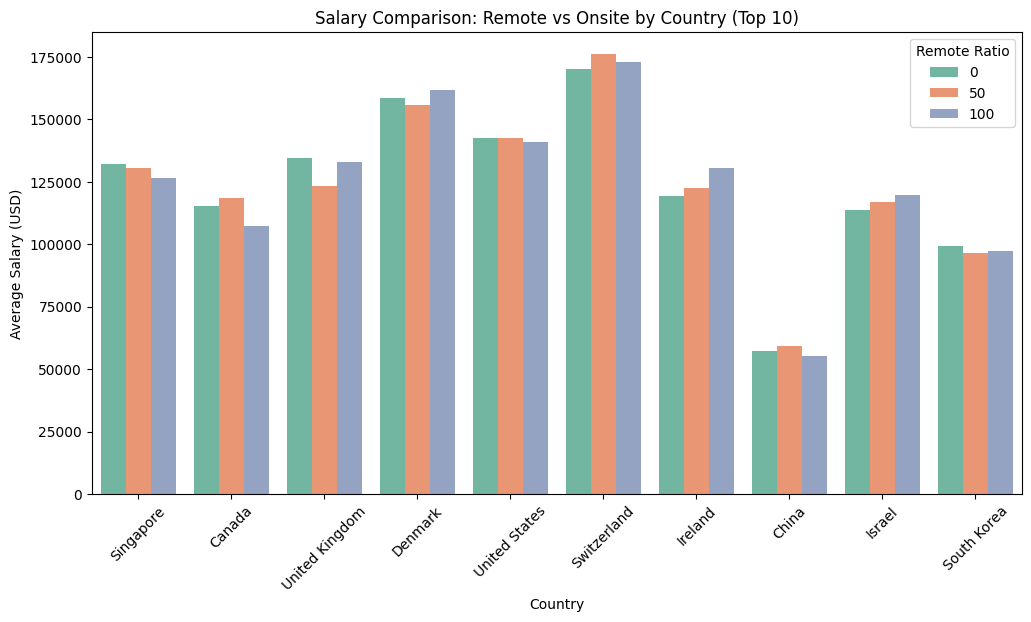

In [52]:
top_countries = df['company_location'].value_counts().head(10).index
df_top = df[df['company_location'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.barplot(x="company_location", y="salary_usd", hue="remote_ratio", data=df_top, palette="Set2", ci=None)
plt.title("Salary Comparison: Remote vs Onsite by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.legend(title="Remote Ratio")
plt.show()

Salary Prediction (ML Model)

In [47]:
df_encoded = pd.get_dummies(df[["salary_usd", "experience_level", "employment_type", "company_size", "remote_ratio"]], drop_first=True)

X = df_encoded.drop("salary_usd", axis=1)
y = df_encoded["salary_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 36718.01368396049


In [49]:
salary_summary = df.groupby("job_title")["salary_usd"].mean().reset_index()
salary_summary.to_csv("salary_summary.csv", index=False)

from google.colab import files
files.download("salary_summary.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>